# Projeto de K Nearest Neighbors - Dados Camuflados

O conjunto de dados é um conjunto de dados sem aparente significado por não terem suas devidas etiquetas, este é um projeto para simplesmente explicar o funcionamente do KNN.


## Importes

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Obtendo os dados


In [11]:
df = pd.read_csv('KNN_Project_Data')

## Head()

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Análise exploratória de dados

Uma vez que esses dados são artificiais, vamos criar um grande pairplot com o Seaborn.

** O Hue foi definido pela coluna "TARGET CLASS" **

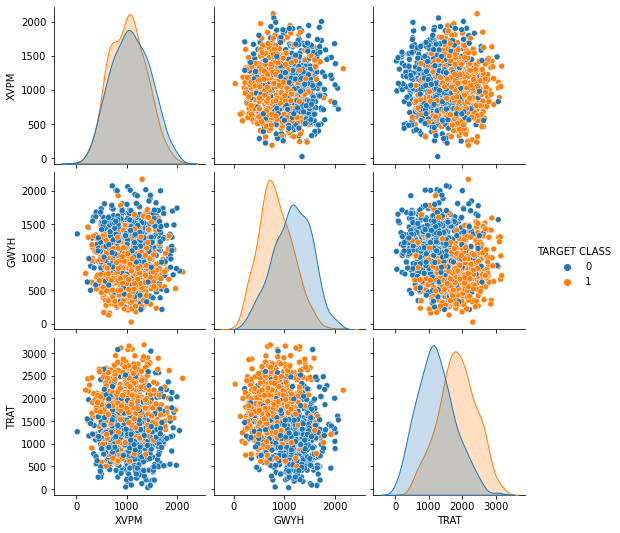

In [9]:
sns.pairplot(data=df[['XVPM','GWYH','TRAT','TARGET CLASS']], hue='TARGET CLASS')

# Normalizando as variáveis

Para o método de KNN precisamos utilizar da normalização pois os dados serão colocados em um mesmo grupo de valor, então eles precisam estar como se fossem na mesma unidade de medida 


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

O método abaixo é o próprio método que faz a normalização

In [13]:
scaler.transform(df.drop('TARGET CLASS', axis=1))

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

Aqui passamos esses valores para um DataFrame, tiramos a coluna "TARGET CLASS" pois ela será a nossa variável Y e não pode estar na variável X

In [14]:
df_normalizado = pd.DataFrame(scaler.transform(df.drop('TARGET CLASS', axis=1)), columns = df.columns[:-1])
df_normalizado.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Divisão treino-teste



In [4]:
from sklearn.model_selection import train_test_split

In [15]:
X = df_normalizado[:]
Y = df['TARGET CLASS']

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.3)

# Usando o KNN


In [3]:
from sklearn.neighbors import KNeighborsClassifier

#### Passando o KNN com 1 vizinho

In [29]:
neighbors = KNeighborsClassifier(n_neighbors=1)

Fitando os dados 

In [33]:
neighbors.fit(X_treino,Y_treino)

KNeighborsClassifier(n_neighbors=1)

# Previsões e avaliações


In [34]:
predict = neighbors.predict(X_teste)

#### Matriz de Confusão e Relatório de Classificação.

In [2]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
qm = confusion_matrix(Y_teste,predict)
linhas = [" Real: NAO", "Real SIM"]
colunas = ["Previsao: NAO", "Previsao: SIM"]


qmprint = pd.DataFrame(data=qm, index=linhas, columns=colunas)
qmprint

,Previsao: NAO,Previsao: SIM
Real: NAO,99,40
Real SIM,37,124


In [39]:
print(classification_report(Y_teste,predict))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       139
           1       0.76      0.77      0.76       161

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



# Escolhendo o valor K
Vamos utilizar o método do cotovelo para escolher um bom valor K!

O método consiste em comparar a taxa de erro para cada K e ver a mudança que obtemos ou não na taxa de erro.

In [32]:
error_rate = []

for i in range(1,200):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_treino,Y_treino)
    pred_i = knn.predict(X_teste)
    error_rate.append(np.mean(pred_i != Y_teste))
    

** Agora crie o seguinte gráfico usando as informações do seu loop. **

Text(0, 0.5, 'Taxa de erro')

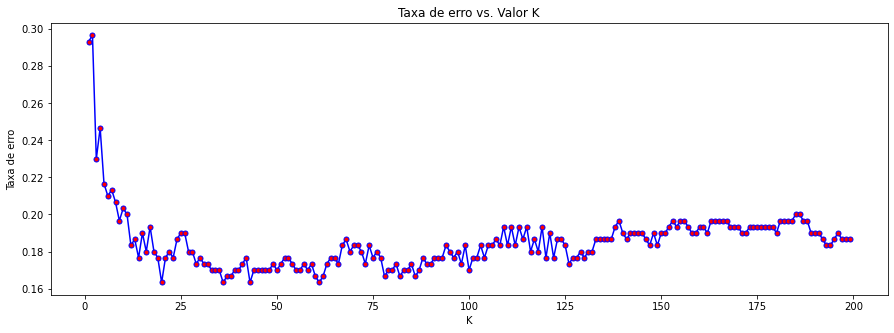

In [42]:
plt.figure(figsize=(15,5))
plt.plot(range(1,200),error_rate,color='blue', marker = 'o',
         markerfacecolor='red', markersize=5)
plt.title('Taxa de erro vs. Valor K')
plt.xlabel('K')
plt.ylabel('Taxa de erro')

Podemos ver algo muito importante neste gráfico, vemos que a taxa de erro, não vária ou vária muito pouco quando chegamos no número de 130 Ks, então devemos treinar o nosso modelo para essa quantidade de Ks

## Treine seu modelo novamente com novo valor K

Agora o modelo será treinado para o novo valor de K 

In [45]:
knn = KNeighborsClassifier(n_neighbors=130)
knn.fit(X_treino,Y_treino)
predict = knn.predict(X_teste)

In [46]:
qm = confusion_matrix(Y_teste,predict)
linhas = [" Real: NAO", "Real SIM"]
colunas = ["Previsao: NAO", "Previsao: SIM"]


qmprint = pd.DataFrame(data=qm, index=linhas, columns=colunas)
qmprint

,Previsao: NAO,Previsao: SIM
Real: NAO,121,35
Real SIM,18,126


In [47]:
print(classification_report(Y_teste,predict))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       156
           1       0.78      0.88      0.83       144

    accuracy                           0.82       300
   macro avg       0.83      0.83      0.82       300
weighted avg       0.83      0.82      0.82       300



Podemos ver uma melhoria bem significativa para as previsões